In [2]:
# KENYA ONE PROJECT #
# Python code to solve for MTOW,other weights,design point plot,#
# Cl calculations and Vn diagram.#
        #-----------------------------------------------------------------#
				 # done by Geoffrey Nyaga Kinyua 
        #-----------------------------------------------------------------#

In [54]:
import numpy as np
import matplotlib.pylab as plt
import math

In [55]:
R = float(input ('enter the value of range(in km)  ') )
n = float(input ('enter the value of propeller efficiency(0.8-0.85)  ') )
AR= float(input ('enter the value of aspect ratio (5-9)  ') )
pax= int(input ('enter the number of passengers  ') )
crew= int(input ('enter the number of pilots  '))

enter the value of range(in km)  1000
enter the value of propeller efficiency(0.8-0.85)  0.8
enter the value of aspect ratio (5-9)  7.8
enter the number of passengers  4
enter the number of pilots  2


In [56]:
Wc=float(crew)*200  #total crew weight
Wpl=(float(pax)*180)+(float(pax)*50) #total payload
print(Wc)
print(Wpl)

400.0
920.0


In [57]:
# breguet range equation 
a= -float(R)*2.52*3280.8399*10 **(-7)
oswaldeff=1.78*(1-0.045*AR **0.68)-0.64 # e is oswalds span efficiency factor 0.7-0.95 #
k=1/(np.pi*oswaldeff*AR) # k is the induced drag factor k=1/(pi*e*AR) #
cdo=0.025  #zerolift drag coefficient
ldmax1=2*np.sqrt(k*cdo) 
ldmax=ldmax1 **(-1) 
b=a/(n*ldmax) 
cfraction=np.exp(b)  # this is w4/w3 #
d = 0.98*0.97*cfraction*0.99*0.997  # this will give W6/W1 #
e=1.05*(1-d)   # Wf/Wto = 1.05(1 - W6/W1) #
# f = A*(Wto **C)*Kvs    f is We/Wto  ......equation 1#
# f = d - (Wpl+Wc)/Wto  ......... ....................equation 2 #
print(e)

0.134240933864


In [20]:
Wto = np.arange(3000,7000,10 )
#raymer empty weight constants
A= 1.51 
C= -0.10 
Kvs=1 
f= A*(Wto**C)*Kvs 
g= d-f 
wto1= g/(Wpl+Wc) 
wto_calculated = wto1 **(-1 )
smallest_difference = wto_calculated - Wto  
h=abs(smallest_difference) 
idx=np.argmin(h) 
#print(idx)
j=(idx) 
k1=Wto[j] 
mtow=k1 
Wf=mtow*e 
We=mtow-(Wf+Wc+Wpl) 
print(' The value of MTOW is ' + str(mtow) + ' lbs')
print(' The value of FUEL is ' + str(Wf)+' lbs')
print(' The value of MTOW is ' + str(We)+' lbs')

 The value of MTOW is 4110 lbs
 The value of FUEL is 302.646678118 lbs
 The value of MTOW is 2687.35332188 lbs


In [22]:
print( '  EMPTY WEIGHT BREAKDOWN                        ')
#initial percentage weights as given by Kundu[3]
wfus=0.085*mtow 
wwing=0.09*mtow 
whtail=0.02*mtow 
wvtail=0.016*mtow 
wnacelle=0.016*mtow 
wundercarriage=0.05*mtow 
wengine=0.185*mtow 
wenginecontrol=0.02*mtow 
wfuelsystem=0.015*mtow 
woilsystem=0.003*mtow 
wapu=0*mtow 
wflightcontsys=0.015*mtow 
whydpneu=0.0055*mtow 
welectrical=0.025*mtow 
winstrument=0.008*mtow 
wavionics=0.02*mtow 
wecs=0.004*mtow 
woxyg=0*mtow 
wfurnishings=0.04*mtow 
wmiscelleneous=0.0015*mtow 
wcontigency=0.01*mtow 
print( '  A) FUSELAGE                         ' + str(wfus)  + '   lb')
print( '  B) WING                             ' + str(wwing)+ ' lb'  )
print( '   C) PROPULSION ')
print( '      a) engine dry weight ' + str(wengine)+ ' lb'  )
print( '      b) nacelle           ' + str(wnacelle) + '  lb')
print( '      c) engine control    ' + str(wenginecontrol) + '  lb')
print( '  D) UNDERCARRIAGE                    ' + str(wundercarriage) +'    lb'   )
print( '  E) TAIL                   '  )

print( '      a) horizontal tail      ' + str(whtail) + '   lb')
print( '      b) verticall tail      ' + str(wvtail) + '   lb')
print( '  F) SYSTEMS  ')
print( '      a) fuel system       ' + str(wfuelsystem) + '   lb')
print( '      b) oil system        ' + str(woilsystem) +'  lb')
print( '      c) a.p.u             ' + str(wapu) +'      lb')
print( '      d) flight contr. sys ' + str(wflightcontsys) + '   lb')
print( '      e) hyd & pneu sys    ' + str(whydpneu)+'  lb'  )
print( '      f) electrical system ' + str(welectrical)+ '  lb')
print( '      g) instruments       ' + str(winstrument)+'  lb'  )
print( '      h) avionics          ' + str(wavionics)+ '   lb'  )
print( '      i) ecs               ' + str(wecs) +'  lb')
print( '      j) oxygen system     ' + str(woxyg) +'      lb')
print( '  G) FURNISHINGS                      ' + str(wfurnishings)+' lb'  )
print( '  H) CONTIGENCY                       ' + str(wcontigency) +'  lb')
print( '  I)MISCELLLENEOUS                    ' + str(wmiscelleneous)+'  lb')
print( '                                      _________    ')

calcemptyw=wfus+wwing+whtail+wvtail+wnacelle+wundercarriage+wengine+wenginecontrol+wfuelsystem+woilsystem+wapu+wflightcontsys+whydpneu+welectrical+winstrument+wavionics+wecs+woxyg+wfurnishings+wmiscelleneous+wcontigency

error=((calcemptyw-We)/We)*100 
print( '  TOTAL CALCULATED EMPTY WEIGHT        ' + str(calcemptyw)+'  lb' )
print( '                          ')
print( '  INITIAL ESTIMATED EMPTY WEIGHT       ' + str(We)+'  lb')

print( '  PERCENTAGE ERROR            ' + str(error),' %' )

  EMPTY WEIGHT BREAKDOWN                        
  A) FUSELAGE                         349.35   lb
  B) WING                             369.9 lb
   C) PROPULSION 
      a) engine dry weight 760.35 lb
      b) nacelle           65.76  lb
      c) engine control    82.2  lb
  D) UNDERCARRIAGE                    205.5    lb
  E) TAIL                   
      a) horizontal tail      82.2   lb
      b) verticall tail      65.76   lb
  F) SYSTEMS  
      a) fuel system       61.65   lb
      b) oil system        12.33  lb
      c) a.p.u             0      lb
      d) flight contr. sys 61.65   lb
      e) hyd & pneu sys    22.605  lb
      f) electrical system 102.75  lb
      g) instruments       32.88  lb
      h) avionics          82.2   lb
      i) ecs               16.44  lb
      j) oxygen system     0      lb
  G) FURNISHINGS                      164.4 lb
  H) CONTIGENCY                       41.1  lb
  I)MISCELLLENEOUS                    6.165  lb
                                    

In [23]:
print( '____________________________________________________ ')
print( '   NOW ENTER THE INITIAL PERFORMANCE DATA ESTIMATES  ')
print( ' ___________________________________________________ ')


h= float(input(' Ceiling (ft) ===>  ') )
vmaxe=float(input(' Vmax (knots) ===>  ') )
sto=float(input(' Take-Off Run (ft) ===>  ') )
vstall=float(input(' Stall speed (61knots max) ===>  ') )
roc_estimate= float(input(' rate of climb (m/s) ===>  ') )

print( '                          ')
print( 'A GRAPH OF POWER LOADING VS WING LOADING IS SHOWN HERE' )
print( '                          ')
print( '- - - - - - - - - - - - - - - - - - - - - - - - - - ' )
print( 'PLEASE READ THE GRAPH AND FILL IN THE VALUES BELOW')
print( '- - - - - - - - - - - - - - - - - - - - - - - - - - ' )
print( '                          ')

____________________________________________________ 
   NOW ENTER THE INITIAL PERFORMANCE DATA ESTIMATES  
 ___________________________________________________ 
 Ceiling (ft) ===>  20000
 Vmax (knots) ===>  170
 Take-Off Run (ft) ===>  1200
 Stall speed (61knots max) ===>  61
 rate of climb (m/s) ===>  2
                          
A GRAPH OF POWER LOADING VS WING LOADING IS SHOWN HERE
                          
- - - - - - - - - - - - - - - - - - - - - - - - - - 
PLEASE READ THE GRAPH AND FILL IN THE VALUES BELOW
- - - - - - - - - - - - - - - - - - - - - - - - - - 
                          


In [24]:
# WS = W/S WING LOADING lb/ft **2 #
# WP = W/P POWER LOADING lb/hp # 

                   #Vmax calculations#

ws = np.arange(5,30)
propEff=0.7 
do = 0.002378 
vmax = vmaxe*1.688 # we have assumed it is 150 knots#
cdo=0.025  #cdo = 0.022 - 0.028#

# AR=7.5 AR is the aspect ratio 5-9 for GA aircraft #
# e=0.8 e is oswalds span efficiency factor 0.7-0.95 #

#k=1/(np.pi*oswaldeff*AR) 
dalt=0.001756 
rade=(1- (h*6.873*10 **(-6))) ** 4.26
d1=0.5*do*(vmax **3)*cdo 
d4a=d1/ws 
d2=(2 * k) /(dalt*rade*vmax) 
nume=0.7*550 
wpvmax =nume/(d4a+(d2*ws))

In [25]:
# TAKE-OFF RUN CALCULATION#
vto=1.1*vstall*1.688 
cdo=0.025 
U=0.04 
CLC=0.4042 
CLFLAP=0.8 
CLTO=CLC+CLFLAP 
CDOLG=0.009 
CDOHLD=0.007 
CDOTO=cdo+CDOLG+CDOHLD 
CDTO=CDOTO+k*CLTO **2 
CLR=1.8/1.1 **2 
CDG=CDTO-U*CLTO 
mf4=0.6*do*32.17*CDG*sto 
mf2=ws/(mf4) 
mf3=mf2 **-1 
mf=2.71828183**(mf3) 
mf1=U+(CDG/CLR) 
mf5=(1-mf) 
mf6=mf1*mf 
mff=(mf5)/(U-(mf6)) 
wptor= (mff*0.6*550)/(vto)

In [26]:
# SERVICE CEILING CALCULATION #

e1= math.sqrt (3*cdo/k) 
f=2/(dalt*e1) 
h=np.sqrt(f*ws) 
g=1.155/(ldmax*0.7*550) 
i=g*h 
j=i/rade 
l=j**-1 
wpc=l

In [27]:
#RATE OF CLIMB CALCULATION#

roc_estimate1=roc_estimate*3.28084 

f1=2/(do*e1) 
h1=np.sqrt(f1*ws) 
i=g*h1 
h2=roc_estimate1/(0.7*550) 
i1=h2+i 
l=i1**-1 
wproc=l

In [28]:
#Vstall calculations#
WP=np.arange(1,51)
clmax=1.8 
vs=vstall*1.688  #vs is stall speed and the minimun by law is 61knots#
WS3 = 0.5*do*clmax*vs **2 
#clmax is between 1.6-2.2 so we take 1.6 #
#plot(WS3 , WP)#

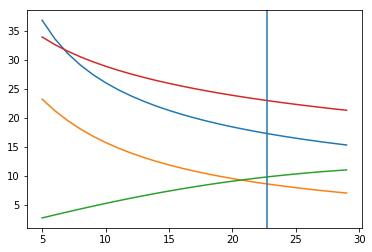

In [29]:
plt.plot(ws , wpc)
plt.plot(ws , wptor)
plt.plot(ws , wpvmax)
plt.plot(ws , wproc)
plt.axvline(x=WS3)

plt.show()

In [30]:
#******************************************PART TWO *********************************************************** #
    #******************************************AIRFOIL PARAMETERS ************************************************* #

In [31]:
x = float(input (' enter the value of w/p -> ') )
x1 = float(input (' enter the value of w/s -> ') )

 enter the value of w/p -> 10
 enter the value of w/s -> 22.5


In [32]:
S=mtow/(x1*10.57) 
P=mtow/x 

print( ' Wing Surface Area =  ' + str(S)+ ' sq. m' )
print( ' Engine Power =  ' + str(P)+' horsepower' )

 Wing Surface Area =  17.2816146326 sq. m
 Engine Power =  411.0 horsepower


In [33]:
# RESOLVING FOR FINAL VALUES #

In [34]:
# Vs RESOLVE#


vs1= (x1)/(0.5*do*clmax) 
Vs2= math.sqrt (vs1) 
Vs3= Vs2/1.688

In [35]:
# Vmax RESOLVE #

x2=(0.7*550)/x 

c=6.873*10 **-6 
rade=(1-c*10000)**4.26 
y=(0.5*do*cdo)/x1 

z=(2*k*x1)/(dalt*rade) 
z1= [ y, 0, 0, -x2, z] 
s = np.roots (z1) 
z=s[3] 
z1=abs(z) 
z2=z1/1.688

In [36]:
# Take-off Run Resolve

a= ((x*vto)/(0.6*550)) 
#b= exp (0.6*do*32.17*CDG*sto/x1) 
c=U+(CDG/CLR) 
d=(1-a*U)/(1-a*c) 
sto1=np.log(d) 
sto2=sto1/(0.6*do*32.17*CDG/x1)

In [37]:
#Rate Of Climb Resolve

k=1/(np.pi*oswaldeff*AR) 
e1= np.sqrt (3*cdo/k) 
f1=2/(do*e1) 
h1=np.sqrt(f1*x1) 
g=1.155/(ldmax*0.7*550) 
i=g*h1 
roc1=(1-(x*i))*0.7*550/x 
roc=roc1*0.3048

In [38]:
vc=z1/1.2 
vs=Vs2 
S1=S*10.76 
#Wave=0.5*(mtow*2) 
wbc=0.98*0.97*mtow 
wec=wbc*cfraction 
Wave=(wbc+wec)/2 
dalt=0.001756 
do=0.002378 
clc=(2*Wave)/(dalt*S1*vc**2) 
clcw=clc/0.95 
cli=clcw/0.9 

clmaxn=(2*mtow)/(do*S1*vs **2) 
clmaxw=clmaxn/0.95 
clmaxgross=clmaxw/0.9 
clmax=clmaxgross-0.6  #cfc = cf/c #

In [39]:
print( '- - - - - - - - - - - - - - - - - - - - - - - - - - ' )
print( '               CALCULATED PERFORMANCE VALUES                           ')
print( '- - - - - - - - - - - - - - - - - - - - - - - - - - ' )
print( '                          ')
print( '    a) WING SURFACE AREA (in sq. meter) is ' + str(S) )
print( '    b) POWER REQUIRED (in horsepower)  is '  + str(P) )
print( '    c) AIRCRAFT STALL SPEED (in knots) is '  + str(Vs3) )
print( '    d) AIRCRAFT MAX. SPEED (in knots) is '  + str(z2) )
print( '    e) AIRCRAFT Take-Off RUN  (in ft ) is '  + str(sto2) )
print( '    f) AIRCRAFT Rate Of Climb   (in m/s) is '  + str(roc) )

- - - - - - - - - - - - - - - - - - - - - - - - - - 
               CALCULATED PERFORMANCE VALUES                           
- - - - - - - - - - - - - - - - - - - - - - - - - - 
                          
    a) WING SURFACE AREA (in sq. meter) is 17.2816146326
    b) POWER REQUIRED (in horsepower)  is 411.0
    c) AIRCRAFT STALL SPEED (in knots) is 60.74235657546372
    d) AIRCRAFT MAX. SPEED (in knots) is 26.7869704755
    e) AIRCRAFT Take-Off RUN  (in ft ) is 1440.89541098
    f) AIRCRAFT Rate Of Climb   (in m/s) is 8.64062257421


In [40]:
print( '*********USE THE BELOW VALUES FOR AEROFOIL SELECTION PROCESS *****************')
print( '*********USE THE cli_clmax.doc document provided to match *****************')
print( '                          ')

*********USE THE BELOW VALUES FOR AEROFOIL SELECTION PROCESS *****************
*********USE THE cli_clmax.doc document provided to match *****************
                          


In [41]:
print( '   a) IDEAL LIFT COEFFICIENT (cli) is  '  + str(cli) )
print( '   b) NET MAX. LIFT COEFFICIENT (Clmax) is '  + str(clmax) )

   a) IDEAL LIFT COEFFICIENT (cli) is  19.6247537108
   b) NET MAX. LIFT COEFFICIENT (Clmax) is 1.46808843671


In [42]:
#WING PARAMETERS#

wingspan= np.sqrt (AR*S) 
wmeanchord= wingspan/AR 
wtaper=0.45 
wcroot=(wmeanchord*3) / (2*((1+wtaper+wtaper **2)/(1+wtaper))) 
wctip=wtaper*wcroot 
#re=(Vs3*1.688*wmeanchord/3.28084)/(1.460*10 **-5) 

print( '   i) WINGSPAN     '  + str(wingspan) + ' m')
print( '   ii) MEAN CHORD LENGTH     '  + str(wmeanchord) + ' m')
print( '   iii) WING ROOT LENGTH   '  + str(wcroot) +' m' )
print( '   iv) WING TIP LENGTH   '  + str(wctip) +' m' )
#print( ['   v) AIRFOIL REYNOLDS NUMBER   is  ' , + str(re) ])

   i) WINGSPAN     11.6101935442 m
   ii) MEAN CHORD LENGTH     1.48848635182 m
   iii) WING ROOT LENGTH   1.95912727093 m
   iv) WING TIP LENGTH   0.88160727192 m


In [43]:
#tire sizing
ww=0.9*mtow*0.5 
mwdiameter=1.51*ww **0.349 
mwwidth=0.7150*ww **0.312

In [44]:
print( '  TIRE SIZING')
print( '          ')

print( '   main wheel diameter     '  + str(mwdiameter) + ' in')
print( '   main wheel width     '  + str(mwwidth) + ' in')

  TIRE SIZING
          
   main wheel diameter     20.8534977957 in
   main wheel width     7.47527190921 in


In [45]:
#fuselage sizing
lfus=(0.86*(mtow) **0.42)/3.28084 
print( '            ')
print( '  FUSELAGE  SIZING')
print( '          ')
print( '   Fuselage length    '  + str(lfus) + ' meters')

            
  FUSELAGE  SIZING
          
   Fuselage length    8.63628498915 meters


In [46]:
m=mtow/2.20462  #kg
#S=24.3919  #sq m
clmax=1.8 
negclmax=-1.2 
#AR=7.8 
clalfa=6.8754 
vci=vc 
vc=vci/1.688 
nmax=3.8 
negnmax=-(0.5*nmax) 
vd=1.55*vc 
f=[nmax,vd] 
g=[negnmax,vd] 
weight=m*9.81 
dsi=1.225

In [47]:
o=[0,0] 
vsi=vs/1.688 
vs=vsi 
a=[1,vs] 
v1=np.sqrt( (nmax*weight)/(0.5*dsi*S*clmax) )  # m/s
v= v1*1.94384 
b=[nmax , v] 


vst1= np.sqrt( (-2*weight)/(dsi*S*negclmax) )  # m/s
vst= vst1*1.94384 
k=[-1 , vst]

In [48]:
# from origin to A
x=np.arange(vs)
x1=x/1.94384 
y1=((0.5*dsi*S*clmax)/weight)*x1 **2

In [49]:
x2=np.arange(vs,v)
x22=x2/1.94384 
y2=((0.5*dsi*S*clmax)/weight)*x22 **2

In [51]:
x3=np.arange(v,vd,0.1)
y3=nmax 

#plt.plot(x3, y3)
plt.show()

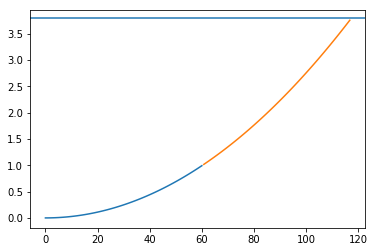

In [53]:
plt.plot (x,y1)
plt.plot(x2,y2)
plt.axhline(y=y3)
plt.show()

In [ ]:

         # from A to B

x2=vs:v 
x22=x2/1.94384 
y2=((0.5*dsi*S*clmax)/weight)*x22. **2 
plot (x2,y2,'-','Color',[0 1 0] ,'Linewidth',0.1)
hold on

     #from B to F

x3=v:0.1:vd 
y3=nmax 
plot(x3, y3,'k-','Color',[0 0 1] ,'Linewidth',1.5)

        #from F to G
y4=negnmax:0.01:nmax 
x4=vd 
plot(x4,y4,'k-','Color',[1 0 1] ,'Linewidth',1.5)


         #from origin to K
x5=0:vst 
x55=x5/1.94384 
y5=((0.5*dsi*S*negclmax)/weight)*x55. **2 
plot (x5,y5,'-','Color',[0 1 1] ,'Linewidth',0.1)

        #from K to J
v6= sqrt( negnmax/((0.5*dsi*S*negclmax)/(weight)) ) 
v61=v6*1.94384 
x6=vst:v61 
x66=x6/1.94384 
y6=((0.5*dsi*S*negclmax)/weight)*x66. **2 
plot (x6,y6,'-','Color',[1 0 1] ,'Linewidth',0.1)


          #from G to J

y7=negnmax 
x7=v61:0.1:vd 
plot (x7,y7,'-','Color',[0 0 1] ,'Linewidth',0.1)

title ('Vn Diagram')






